# numerical methods
## fall 2023 | lecture 08
## elvis has left the building

### cholesky factorizaton

#### algorithm


```
for i = 1,n
  if A[i,i] < 0
    break
  R[i,i] = √A[i,i]
  for j = i+1,n
    uT = A[i,j] / R[i,i]
    R[i,j] = uT
    A[j,j] = Aj,j] - uuT
end

```

alternatively, use numpy.

https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html


```
L = linalg.cholesky(a)
```


one step, elimination yields: $R$ where $A = R^TR$.

two steps, backward substitution yields $x$: where $R^Tc = b \Rightarrow Rx = c$.


#### code

In [ ]:
# hw03 m385 backsub

import numpy as np

def bwdsub (aa,ab):
  x = np.zeros_like(ab)
  n = x.shape[0]
  for i in reversed(range(n)):
    sum_ax = 0;
    for j in range(i+1,n):
      sum_ax = sum_ax + aa[i,j]*x[j]
    x[i] = (ab[i]-sum_ax)/aa[i,i]
  return x;

def fwdsub (aa,ab):
  x = np.zeros_like(ab)
  n = x.shape[0]
  for i in range(n):
    sum_ax = 0;
    for j in range(i):
      sum_ax = sum_ax + aa[i,j]*x[j]
    x[i] = (ab[i]-sum_ax)/aa[i,i]
  return x;


In [ ]:
# cholesky # 2.6.7.b.

# import statements
import numpy as np

# assign test data
#a = np.array([[4.,-2.,2.],[-2.,2.,-4.],[2.,-4.,11.]])
a = np.array([[4.,-2.],[-2.,10.]])
b = np.array([[10.],[4.]])

# cholesky factorization
rt = np.linalg.cholesky(a) # numpy returns L
r = np.transpose(rt)       # R = transpose(L)
#a_cholesky = np.dot(rt,r)  # reconstitute A to verify

print(f"{a} = A, original\n")
print(f"{r} = R\n")
print(f"{rt} = RT\n")
#print(f"{a_cholesky} = A, reconstituted")

c = np.zeros_like(b)
c = fwdsub(rt,b)
print(f"{c} = c\n")

x = np.zeros_like(b)
x = bwdsub(r,c)
print(f"{x} = x")


[[ 4. -2.]
 [-2. 10.]] = A, original

[[ 2. -1.]
 [ 0.  3.]] = R

[[ 2.  0.]
 [-1.  3.]] = RT

[[5.]
 [3.]] = c

[[3.]
 [1.]] = x


### conjugate gradient

#### algorithm

##### homely

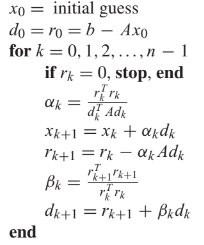



```
x[0] = initial guess
d[0] = r[0] = b - a*x[0]
for k = 0,n-1
  if r[k] = 0
    break

  alpha[k] = transpose(r[k])*r[k] / (transpose(d[k])*A*d[k])
  x[k+1] = x[k] + alpha[k]*d[k]
  r[k+1] = r[k] - alpha[k]*A*d[k]
  beta[k] = (transpose(r[k+1])*r[k+1]) / (transpose(r[k])*r[k])
  d[k+1] = r[k+1] + beta[k]*d[k]
```


alternatively, use scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html

#### code

In [ ]:
# conjugate gradient

# import statements
import numpy as np
import scipy as sp

# assign test data
#a = np.array([[1.,2.],[2.,5.]])
#b = np.array([[1.],[3.]])
a = np.array([[1.,-1.],[-1.,5.]])
b = np.array([[3.],[-7.]])
x = np.zeros_like(b)
x0 = np.zeros_like(b)

# conjugate gradient
x = sp.sparse.linalg.cg(a,b,x0)[0]
ax = np.dot(a,x)
#r = b - ax.T # bc scipy
r = np.zeros_like(b)
for i in range(len(r)):
  r[i] = b[i,0] - ax[i]

print(f"{a} = A, original\n")
print(f"{x} = x\n")
print(f"{b} = b\n")
print(f"{r} = r\n")


[[ 1. -1.]
 [-1.  5.]] = A, original

[ 2. -1.] = x

[[ 3.]
 [-7.]] = b

[[-8.88178420e-16]
 [ 1.77635684e-15]] = r

